In [34]:
import numpy as np
import pandas as pd
import math
import os
import PIL
import sys
import PIL.Image
from PIL import Image
from io import StringIO
import tensorflow as tf
from zipfile import ZipFile
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [35]:
img=Image.open('img (1).jpg') #importing using PIL

In [36]:
print(img.format)

JPEG


In [37]:
img1=np.asarray(img)#Converting it to nparray for standard applications

In [38]:
img1.shape

(1235, 1653, 3)

In [39]:
# pip install opencv-python
# pip install git+git://github.com/jaidedai/easyocr.git

In [40]:
import cv2

In [41]:
img=cv2.imread('img (1).jpg',1)

In [42]:
# cv2.imshow('color img',img)
# cv2.waitKey(0)
# cv2.destoryAllWindows()

In [43]:
#glob
import glob

In [44]:
path="Users/shridhar/Hackathon Dr. reddy*.JPG"

path1='Users/shridhar/OneDrive - smail.iitm.ac.in/Desktop'

In [45]:
filenames = glob.glob("test_set/*.jpg")
filenames.sort()
images = [cv2.imread(img) for img in filenames]

# for img in images:
# #     print(img)

In [46]:
for i in range(len(images)):
    print(images[i].shape)

(1235, 1653, 3)
(1600, 2134, 3)
(1600, 2134, 3)
(1653, 2339, 3)
(1235, 1653, 3)
(512, 683, 3)
(1653, 2339, 3)
(1653, 2339, 3)
(1600, 2134, 3)
(1235, 1653, 3)
(1653, 2339, 3)
(1653, 2339, 3)
(1600, 2134, 3)
(1600, 2134, 3)
(1600, 2134, 3)
(1653, 2339, 3)
(1600, 2134, 3)
(512, 683, 3)
(512, 683, 3)
(1653, 2339, 3)
(1600, 2134, 3)


In [47]:
import easyocr
import cv2

#For the first time it downloads the models for the languages chosen below. 
#Not all languages are compatible with each other so you cannot put
#multiple languages below
#reader = easyocr.Reader(['hi', 'te', 'en'])  #Hindi, telugu, and English
#The above gives error that Telugu is only compatible with English.

#So let us just use Hindi and English 
#To use GPU you need to have CUDA configured for the pytorch library.
reader = easyocr.Reader(['hi', 'en'], gpu=False)  #Hindi, telugu, and English

img = cv2.imread('img (10).jpg')


results = reader.readtext(img, detail=1, paragraph=False) #Set detail to 0 for simple text output
#Paragraph=True will combine all results making it easy to capture it in a dataframe. 


#To display the text on the original image or show bounding boxes
#we need the coordinates for the text. So make sure the detail=1 above, readtext.
# display the OCR'd text and associated probability
for (bbox, text, prob) in results:
    
    #Define bounding boxes
    (tl, tr, br, bl) = bbox
    tl = (int(tl[0]), int(tl[1]))
    tr = (int(tr[0]), int(tr[1]))
    br = (int(br[0]), int(br[1]))
    bl = (int(bl[0]), int(bl[1]))
    
    #Remove non-ASCII characters to display clean text on the image (using opencv)
    text = "".join([c if ord(c) < 128 else "" for c in text]).strip()
   
    #Put rectangles and text on the image
    cv2.rectangle(img, tl, br, (0, 255, 0), 2)
    cv2.putText(img, text, (tl[0], tl[1] - 10), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
# show the output image
# cv2.imshow("Image", img)
# cv2.waitKey(0)

#####################################################################



Using CPU. Note: This module is much faster with a GPU.


In [48]:
results
texts=[x[1] for x in results]
locations=[x[0] for x in results]

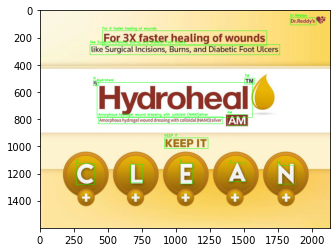

In [49]:
# # pip3 install torch torchvision torchaudio
plt.imshow(img)
plt.show()

In [50]:
#Read multiple images in a directory, extract text using OCR and capture 
# it in a pandas dataframe. 
import cv2
import glob
import pandas as pd

# #select the path
path = "test_set/*.jpg"
img_number = 1 
reader = easyocr.Reader(['en'])  #English
df=pd.DataFrame()
L = []
for file in glob.glob(path):
    img= cv2.imread(file, 0)  #now, we can read each file since we have the full path
    results = reader.readtext(img, detail=1, paragraph=True) #Set detail to 0 for simple text output
    texts=[x[1] for x in results]
    locations=[x[0] for x in results]
    dat= [[file, texts, locations]]
    L.append(dat)
    img_number +=1

#     df.insert(0, 'file', file)
#     df.insert(1, 'locations', locations)
#     df.insert(2, 'text', texts)
#     df['image']=df.append(list(file), ignore_index=True)
#     df['detected_text']=df['detected_text'].append(texts, ignore_index=True)
#     df['locations']=df['locations'].append(loacations, ignore_index=True)
#     df = df.append(pd.DataFrame({'image': file, 'detected_text':texts,'location':locations}, index=[0]), ignore_index=True)
       

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [51]:
L=np.array(L)

<ipython-input-51-93369efff158>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  L=np.array(L)


In [52]:
# df = pd.DataFrame(L[][], columns = )

In [53]:
# names = ['file', 'texts', 'locations']
# index = pd.MultiIndex.from_product([range(s)for s in L.shape], names=names)
# df = pd.DataFrame({'A': L.flatten()}, index=index)

In [54]:
L.shape

(21, 1, 3)

In [55]:
a,b,c = L.shape
df= pd.DataFrame(L.reshape(21,-1),index=np.repeat(np.arange(a),b),columns=['file', 'texts', 'locations'] )

In [56]:
a = np.array([[1,2,3], [4,5,6]])
a.reshape(6,-1)

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6]])

In [57]:
df['words']=0
for i in range(len(df)):
    df['words'][i]=[word for line in df['texts'][i] for word in line.split()]

<ipython-input-57-3c5ebd20cdeb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['words'][i]=[word for line in df['texts'][i] for word in line.split()]
C:\Users\shridhar\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [58]:
df['total_words']=0
for i in range(len(df)):
    df['total_words'][i]=len(df['words'][i])


<ipython-input-58-bf322f159c30>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_words'][i]=len(df['words'][i])


In [59]:
# df.to_excel('text.xlsx')

In [60]:
df

,file,texts,locations,words,total_words
0,test_set\img (1).jpg,"[DrReddys, In cough associated with cold R ZED...","[[[1439, 48], [1561, 48], [1561, 78], [1439, 7...","[DrReddys, In, cough, associated, with, cold, ...",67
1,test_set\img (10).jpg,"[Dr Reddys, For 3X faster healing of wounds li...","[[[1835, 63], [2023, 63], [2023, 107], [1835, ...","[Dr, Reddys, For, 3X, faster, healing, of, wou...",35
2,test_set\img (11).jpg,"[nisegel_ Tough on Pain, Back Pain, Knee Pain,...","[[[1364, 18], [1955, 18], [1955, 267], [1364, ...","[nisegel_, Tough, on, Pain, Back, Pain, Knee, ...",61
3,test_set\img (12).jpg,"[Treatment of Dyslipidemia patients based on, ...","[[[653, 173], [1685, 173], [1685, 260], [653, ...","[Treatment, of, Dyslipidemia, patients, based,...",77
4,test_set\img (13).jpg,"[In Hypertensive Patients With CKD, D A Y Stai...","[[[103, 123], [715, 123], [715, 500], [103, 50...","[In, Hypertensive, Patients, With, CKD,, D, A,...",55
5,test_set\img (14).jpg,"[Dr-Redats, The only guardian mouthwash;, with...","[[[612, 16], [652, 16], [652, 24], [612, 24]],...","[Dr-Redats, The, only, guardian, mouthwash;, w...",71
6,test_set\img (15).jpg,"[Dr Reddy's, DAY 3, Continued long term releas...","[[[2030, 73], [2148, 73], [2148, 101], [2030, ...","[Dr, Reddy's, DAY, 3, Continued, long, term, r...",80
7,test_set\img (16).jpg,"[DrReddys, Continued long term release of Ca a...","[[[2026, 71], [2147, 71], [2147, 108], [2026, ...","[DrReddys, Continued, long, term, release, of,...",37
8,test_set\img (17).jpg,"[Senile Xerosis causes intense skin drynessio,...","[[[94, 124], [864, 124], [864, 276], [94, 276]...","[Senile, Xerosis, causes, intense, skin, dryne...",56
9,test_set\img (18).jpg,"[Die Reddys, 'THE ITCH' TAKES CONTROL OVER YOU...","[[[1295, 59], [1503, 59], [1503, 122], [1295, ...","[Die, Reddys, 'THE, ITCH', TAKES, CONTROL, OVE...",21


In [73]:
####Finding area of text 
#np.dot(np.subtract(df['locations'][1][1][3],df['locations'][1][1][0]),np.subtract(df['locations'][1][1][2],df['locations'][1][1][1]))

32041